In [114]:
pred = model.predict(X_test)
serie_test = bitcoin.new_data[-len(Y_test):]['CLOSE'].values

In [115]:
predic = pd.DataFrame(predicted)
fact = pd.DataFrame(serie_test)
itog = pd.concat([predic, fact], axis=1)
itog.columns = (['pred', 'fact'])
itog["predUD"] = find_result(predic)
itog["factUD"] = find_result(fact)

true_long = 0
true_short = 0
vern = 0

for i in range(0,len(itog)):
    if itog["predUD"][i] > 0.5 and itog["factUD"][i] > 0.5:
        true_long = true_long + 1
    elif itog["predUD"][i] < 0.5 and itog["factUD"][i] < 0.5:
        true_short = true_short + 1
  
    if itog["predUD"][i] == itog["factUD"][i]:
        vern = vern + 1
    
per_long = round((true_long/len(itog[itog["factUD"]>0.5]))*100,2)
per_short = round((true_short/len(itog[itog["factUD"]<0.5]))*100,2)
per_vern = round((vern/len(itog))*100,2)

print("Percentage of open orders for increase:", per_long)
print("Percentage of open orders for decrease:", per_short)
print("")
print("The percentage of correct forecasts:", per_vern)
print("--------------------------------------")
itog.head()

print ("MSE =", np.mean(np.square(pred - serie_test)))
print ("MAE =", np.mean(np.abs(pred - serie_test)))
print ("MAPE =", np.mean(np.abs((serie_test - pred) / serie_test)))

Percentage of open orders for increase: 49.37
Percentage of open orders for decrease: 51.67

The percentage of correct forecasts: 11.42
--------------------------------------
MSE = 0.03133510893300317
MAE = 0.1410081513983129
MAPE = inf


/home/daniele/miniconda3/envs/stockpredictor/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


# Backtest

In [116]:
from nsp.nsp_utils import segnale_base
from nsp.Backtest_mio import Backtest_mio

#@markdown The amount of initial capital.
CAPITAL = 1000
#@markdown The share of capital to which we open the order.
CHAST = 0.1
#@markdown The size of the commission for opening/closing an order (%).
commissioni = 0.001

In [117]:
# la serie nell'intervallo di test (diverso da X_test perché X_test è array di WINDOW)


backtest = Backtest_mio(serie_test, CAPITAL, commissioni, commissioni_fisse=0)

# definisco il segnale e parto con il test
test_signal = segnale_base(pred, commissioni)
backtest.calcola(test_signal)

<Figure size 2160x360 with 0 Axes>

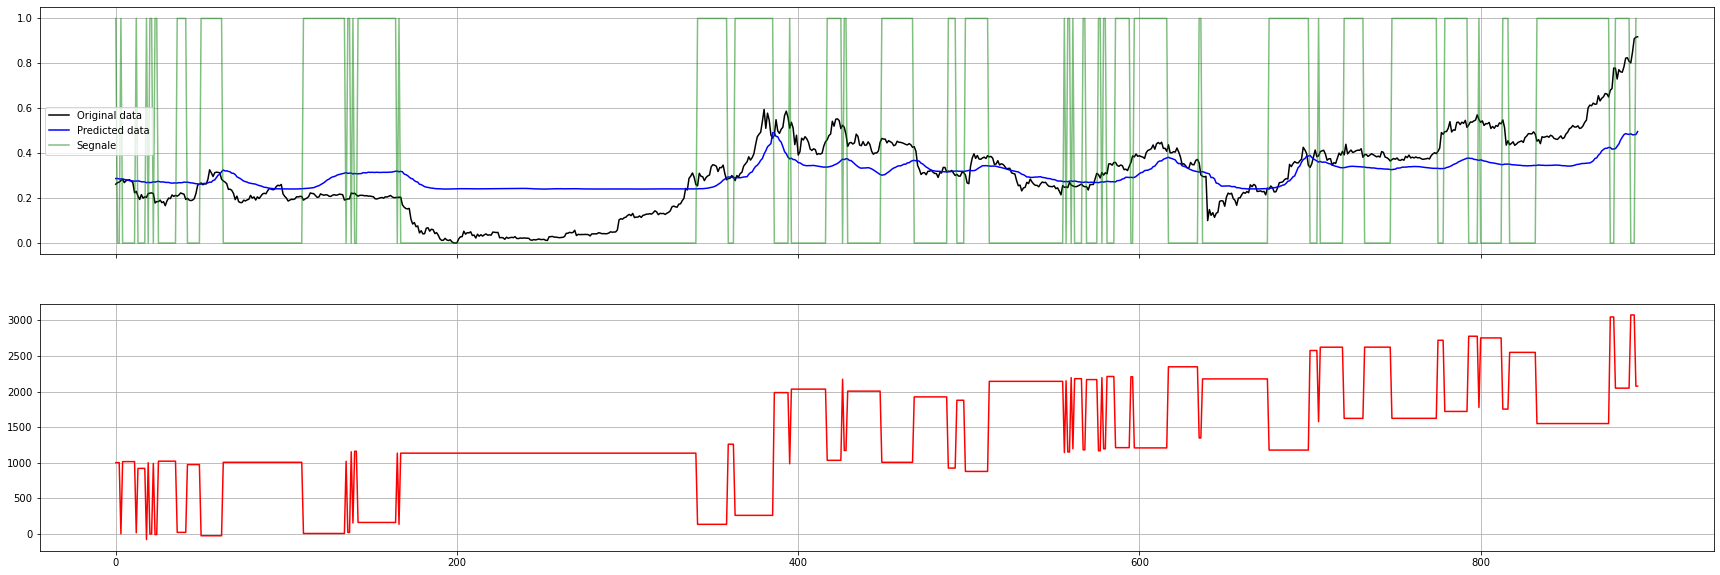

In [118]:
plt.figure(figsize=(30,5))
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(30,10))
#f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(30,15))

start, stop = (0, -1)
ax1.plot(serie_test[start:stop], color = 'black', label = 'Original data')
ax1.plot(pred[start:stop], color = 'blue', label = 'Predicted data')
ax1.plot(test_signal[start:stop], color = 'green', label = 'Segnale', alpha=0.5)
ax1.legend()
ax1.grid(True, which='major')

ax2.plot(backtest.capitale_tempo[start:stop], color = 'red', label = 'Capital')
ax2.grid(True, which='major')
#ax3.plot(itog['stocks'][start:stop], color = 'brown', label = 'Stocks')
#plt.yscale('log')

plt.show()